Model Training

Import Data and Required Packages



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [9]:
df = pd.read_csv('student_data.csv')

In [10]:
df.head(5)

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,Female,NaN,17020.0,16
1,6.48,5.90,4.15,4.29,4.96,115,Male,NaN,17021.0,16
2,8.41,8.24,7.52,8.25,7.75,115,Female,NaN,17022.0,16
3,7.33,6.83,6.33,6.79,6.89,115,Male,NaN,17023.0,16
4,7.89,7.34,7.22,7.32,7.46,115,Male,NaN,17024.0,16




Preparing X and Y variables


In [11]:
new_df = df[['1st','2nd', '3rd', '4th','5th']] 

In [16]:
new_df.isna().sum()

1st    2
2nd    4
3rd    2
4th    5
5th    6
dtype: int64

In [22]:
new_df = df.fillna(0)


In [23]:
new_df.isna().sum()

1st             0
2nd             0
3rd             0
4th             0
5th             0
College Code    0
Gender          0
Roll            0
Roll no.        0
Subject Code    0
dtype: int64

In [36]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())



Categories in 'Gender' variable:      ['Female' 'Male' 'M' 'F' nan]


In [37]:
new_df = df.fillna(method="ffill")


In [39]:
new_df.isna().sum()

1st              0
2nd              0
3rd              0
4th              0
5th              0
College Code     0
Gender           0
Roll            46
Roll no.         0
Subject Code     0
dtype: int64

In [40]:
df1 = new_df.fillna(0)

In [41]:
df1.isna().sum()

1st             0
2nd             0
3rd             0
4th             0
5th             0
College Code    0
Gender          0
Roll            0
Roll no.        0
Subject Code    0
dtype: int64

In [43]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df1['Gender'].unique())


Categories in 'Gender' variable:      ['Female' 'Male' 'M' 'F']


In [44]:
y = df1['5th']

In [45]:
y

0      8.18
1      4.96
2      7.75
3      6.89
4      7.46
       ... 
173    8.65
174    7.38
175    6.50
176    6.92
177    7.00
Name: 5th, Length: 178, dtype: float64

In [52]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((142, 4), (36, 4))

In [49]:
X = df1[['1st','2nd','3rd','4th']] 
y = df1['5th']  

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=1/3, random_state=21)


In [50]:
X

,1st,2nd,3rd,4th
0,8.11,7.68,7.11,7.43
1,6.48,5.90,4.15,4.29
2,8.41,8.24,7.52,8.25
3,7.33,6.83,6.33,6.79
4,7.89,7.34,7.22,7.32
...,...,...,...,...
173,7.48,7.55,7.67,7.39
174,7.30,6.41,6.59,7.11
175,6.30,6.28,5.89,5.71
176,7.04,7.10,6.81,7.00


In [51]:
y

0      8.18
1      4.96
2      7.75
3      6.89
4      7.46
       ... 
173    8.65
174    7.38
175    6.50
176    6.92
177    7.00
Name: 5th, Length: 178, dtype: float64

In [53]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [55]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*27)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.5752
- Mean Absolute Error: 0.4354
- R2 Score: 0.7304
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5742
- Mean Absolute Error: 0.4526
- R2 Score: 0.3752


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.1079
- Mean Absolute Error: 0.9138
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8320
- Mean Absolute Error: 0.6653
- R2 Score: -0.3118


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.5753
- Mean Absolute Error: 0.4353
- R2 Score: 0.7304
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5735
- Mean Absolute Error: 0.4524
- R2 Score: 0.3767


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.5196
- Mean Absolute Error: 0.3843
- R2 Score: 0.7801
----------------------



Results


In [56]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.593340
5,Random Forest Regressor,0.576955
8,AdaBoost Regressor,0.534762
6,XGBRegressor,0.487192
3,K-Neighbors Regressor,0.445095
2,Ridge,0.376746
0,Linear Regression,0.375232
4,Decision Tree,0.237505
1,Lasso,-0.311792


In [76]:

 
# create regressor object
regressor = RandomForestRegressor(n_estimators=100, random_state=1)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [89]:
y_train = regressor.predict(X_test)
difference = y_test - y_train

dif = round(difference, 2)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_train, 'Difference': dif})


In [90]:
df1.head(5)

,Actual,Predicted,Difference
19,7.32,7.5242,-0.20
45,8.11,8.1630,-0.05
140,8.61,8.7452,-0.14
30,7.86,7.5845,0.28
67,8.18,8.1946,-0.01


In [94]:
score = r2_score(y_test, y_train)*100
print(" Accuracy of the model is %.2f" % score )

 Accuracy of the model is 57.54




Plot y_train and y_test

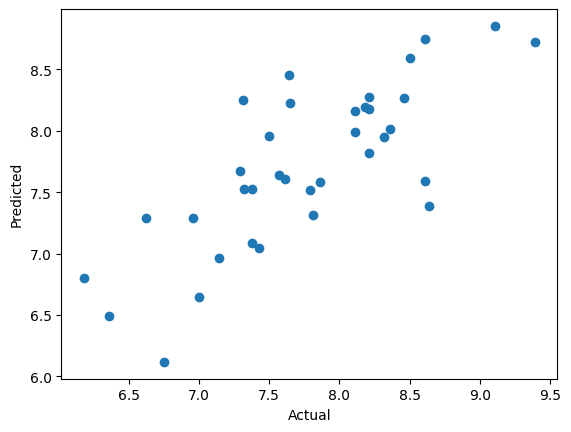

In [95]:

plt.scatter(y_test,y_train);
plt.xlabel('Actual');
plt.ylabel('Predicted');

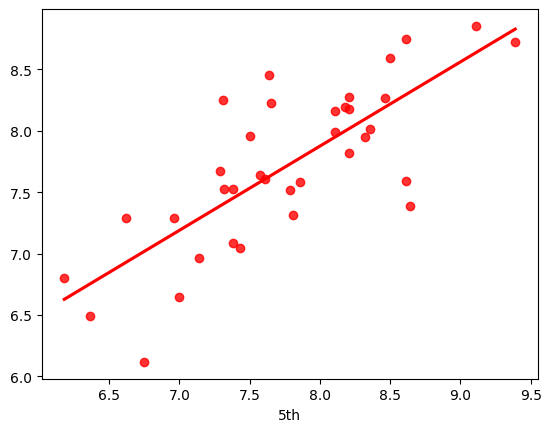

In [97]:
sns.regplot(x=y_test,y=y_train,ci=None,color ='red');